<a id='topo'></a>
## ANÁLISE DE SOBREVIVÊNCIA
### Teoria e aplicações em saúde
#### Capítulo 2: O tempo na análise de sobrevivência
#### Exercícios Resolvidos
###### **Autor: Carlos Ed Beluzo - cbeluzo@gmail.com**

## Tópicos:

* [Importação de bibliotecas e leitura do arquivco CSV](#import)

* Funções:
    * [survival_time_plot](#survival_time_plot)
    * [individual_trajectory_plot](#individual_trajectory_plot)
    * [surv](#surv)


* Exercícios
    * [Exercício 2.1](#Exercicio2.1)
    * [Exercício 2.2](#Exercicio2.2)
    * [Exercício 2.3](#Exercicio2.3)
    * [Exercício 2.4](#Exercicio2.4)
    * [Exercício 2.5](#Exercicio2.5)
    * [Exercício 2.6](#Exercicio2.6)
    * [Exercício 2.7](#Exercicio2.7)
    * [Exercício 2.8](#Exercicio2.8)


**Importação de bibliotecas e leitura do arquivco CSV** <a id='imports'></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install lifelines

**Function:** survival_time_plot  <a id='survival_time_plot'></a>

In [0]:
# Fuction to generate survival time of a group of individuals
from lifelines.plotting import plot_lifetimes

def survival_time_plot(p_entry_individual, p_actual_lifetimes, p_current_time, p_censured, p_time_unit, p_person_type, p_title, p_width, p_height):
    observed_lifetimes = np.minimum(p_actual_lifetimes, p_current_time)
    death_observed = p_actual_lifetimes < p_current_time

    fig = plt.figure(figsize=(p_width,p_height))
    
    ax = plot_lifetimes(durations = observed_lifetimes,
                        event_observed = death_observed,
                        entry = p_entry_individual,
                        left_truncated = True,
                        sort_by_duration = False,
                        event_observed_color = "black",
                        event_censored_color = "r",
                       )

    total_individuals = len(p_actual_lifetimes)
    total_period = max(p_actual_lifetimes+p_entry_individual)
    
    ax.vlines(p_current_time, 0, total_individuals, lw=1, linestyles=':')
    ax.set_xlim(-0.5, total_period + 1)
    ax.set_xticks(np.array(range(0, total_period + 1)))
    ax.set_yticks(np.array(range(0, total_individuals)))
    ax.set_xlabel(p_time_unit, fontsize=12)
    ax.set_ylabel(p_person_type, fontsize=12)
    ax.set_title(p_title, fontsize=16)
    
    ax.set_yticklabels(np.array(range(0, total_individuals))+1)
        
    for iterator in range(0, total_individuals):
        entry = p_entry_individual[iterator]
        lifetime = observed_lifetimes[iterator]
        period = entry + lifetime
        
        ax.text(entry + ((lifetime)/2).astype(int), iterator + 0.2, "T=%d" % lifetime, fontsize=10)
        
        marker = 'x' if p_censured[iterator] == 1 else 'o'
        ax.plot(period, iterator, fillstyle='none', **dict(color='black', marker=marker, markersize=10))
        
    ax.vlines(total_period, 0, total_individuals, lw=1, linestyles='--')
    ax.plot(0,0, label='X - Evento', color='white')
    ax.plot(0,0, label='O - Censura', color='white')
    ax.legend(frameon=False)
    ax.grid(False)
    
    print("Tempo de vida observado: \n", observed_lifetimes, "\n")

**Função** individual_trajectory_plot  <a id='individual_trajectory_plot'></a>

In [0]:
# Função que gera gráfico de tragetória com variáveis N(t) e Y(t) do processo de contagem
def individual_trajectory_plot(p_entry_individual, p_lifetimes, p_censured, p_time_unit):
    
    total_individuals = len(p_lifetimes)
    total_period = max(p_lifetimes + p_entry_individual)
    
    for individual in range(0,total_individuals):
        entrytime = p_entry_individual[individual]
        lifetime = p_lifetimes[individual]
        censured = 'none' if p_censured[individual] == 0 else 'black'
        point = entrytime + lifetime
        
        print("Indivíduo: %d, Trajetória de Sobrevivência: %d." %(individual+1, lifetime))
        fig, ax = plt.subplots(figsize=(6,3))

        # Y(t)
        ax.plot([0, entrytime],[.5, .5], color='r', linewidth=1)
        ax.plot([entrytime, point],[1, 1], color='b', linewidth=1)
        
        if point < total_period:
            ax.plot([point, total_period],[.5, .5], color='r', linewidth=1)
        
        ax.scatter(point, 1, marker="o", color='black', facecolors = censured)
        
        if entrytime > 0:
            ax.vlines(entrytime, 0.5, 1, lw=1, linestyles='--')
            ax.scatter(entrytime, 0.5, marker="o", color='black')
        
        if point < total_period:
            ax.vlines(point, 0.5, 1, lw=1, linestyles='--')
        
        # N(t)
        if censured == 'black':
            ax.plot([0, point],[-1, -1], color='r', linewidth=1)
            ax.plot([point, total_period],[-0.5, -0.5], color='b', linewidth=1)
            
            if point < total_period:
                ax.vlines(point, -1, -0.5, lw=1, linestyles='--')
                ax.scatter(point, -0.5, marker="o", color='black')

            if point < total_period:
                ax.text(point+0.3, -0.7, "dN(t)", fontsize=14)
            else:
                ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)
        else:
            ax.plot([0, total_period],[-1, -1], color='r', linewidth=1)
            ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)

        # Zero line
        ax.plot([0, total_period],[0, 0], color='black')

        ax.set_yticklabels(["", "0", "1","","0","1","",""],rotation=90)
        ax.set_xticklabels([])
        ax.text(0, -1.3, 0, fontsize=10)
        ax.text(entrytime, -1.3, entrytime, fontsize=10)
        ax.text(point, -1.3, point, fontsize=10)
        ax.text(total_period, -1.3, total_period, fontsize=10)

        ax.set_xlabel(p_time_unit, fontsize=14)
        ax.set_xlim(-0.5, total_period + 0.5)
        ax.xaxis.set_label_coords(0.5,-0.15)

        ax.set_ylabel("  $N_{%d}(t)$     $Y_{%d}(t)$  " %(individual+1,individual+1), fontsize=14)

        ax.set_title("$I_{%d}$ -> $T_{%d}=%d$" %(individual+1,individual+1,point), fontsize=14)

        plt.show()

## Exercício 2.1 <a id='Exercicio2.1'></a>

O tempo de aleitamento, isto é, o tempo decorrido desde o nascimento até o desmame, pode ser considerado como uma variável tempo de sobrevivência. Suponha que o tempo  até  o  desmame,  em  meses,  tenha  sido  registrado  para  15  crianças  e  que  todas entraram no estudo no mesmo dia:

Tempos de aleitamento: 6 12 10 3 5 1 6 8 1 5 2 2 5 8 1

Considerando que não houve censura:

* [**a) Represente graficamente os tempos de observação das 15 crianças.**](#E2.1.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.1.b)
* [**c) Como  você  construiria  um  banco  de  dados  para  analisar  estes  dados  pelo  processo clássico?**](#E2.1.c)
* [**d)E pelo processo de contagem?**](#E2.1.d)

[Topo](#topo)

<a id='E2.1.a'></a>
#### a) Represente graficamente os tempos de observação das 15 crianças.

Tempo de vida observado: 
 [ 6 12 10  3  5  1  6  8  1  5  2  2  5  8  1] 



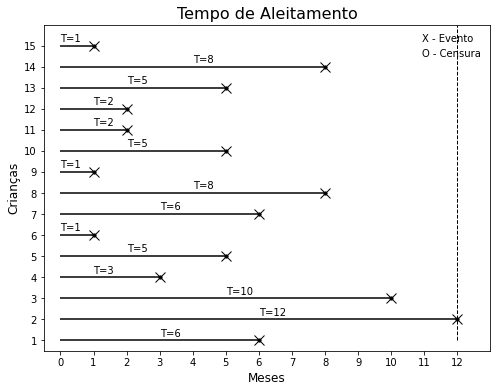

In [4]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
censured = np.ones(15, dtype=np.int)
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Crianças", "Tempo de Aleitamento",
                   8, 6) # Plot size

<a id='E2.1.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.

Indivíduo: 1, Trajetória de Sobrevivência: 6.


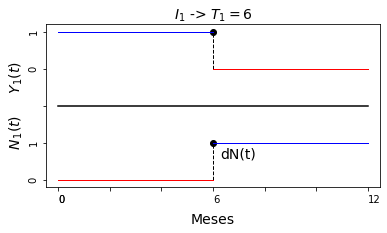

Indivíduo: 2, Trajetória de Sobrevivência: 12.


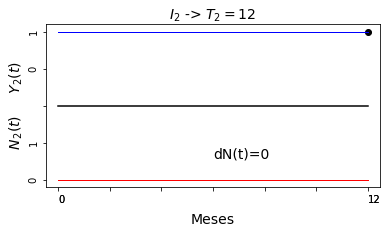

Indivíduo: 3, Trajetória de Sobrevivência: 10.


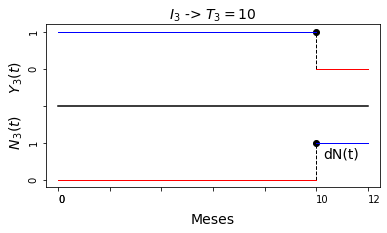

Indivíduo: 4, Trajetória de Sobrevivência: 3.


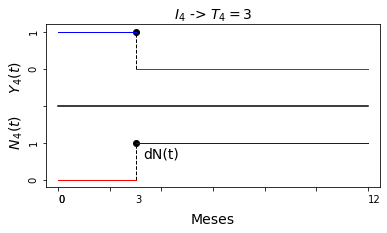

Indivíduo: 5, Trajetória de Sobrevivência: 5.


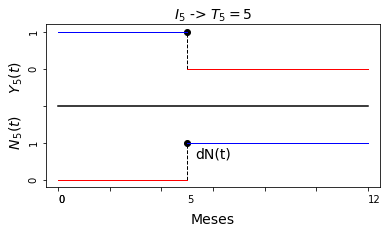

Indivíduo: 6, Trajetória de Sobrevivência: 1.


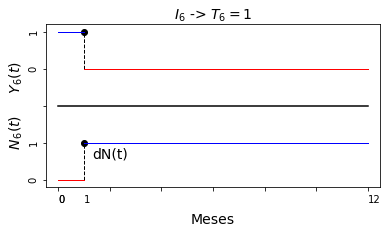

Indivíduo: 7, Trajetória de Sobrevivência: 6.


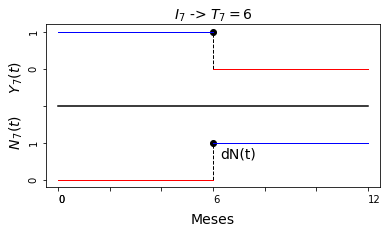

Indivíduo: 8, Trajetória de Sobrevivência: 8.


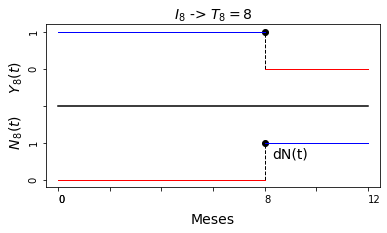

Indivíduo: 9, Trajetória de Sobrevivência: 1.


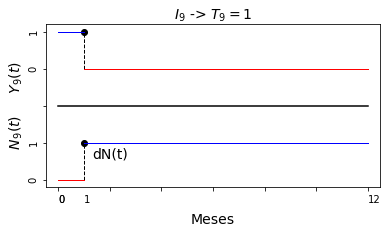

Indivíduo: 10, Trajetória de Sobrevivência: 5.


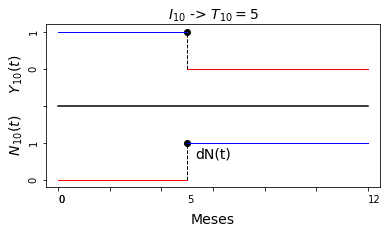

Indivíduo: 11, Trajetória de Sobrevivência: 2.


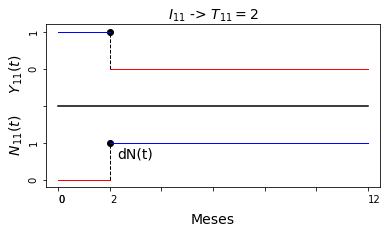

Indivíduo: 12, Trajetória de Sobrevivência: 2.


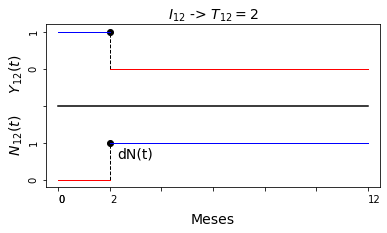

Indivíduo: 13, Trajetória de Sobrevivência: 5.


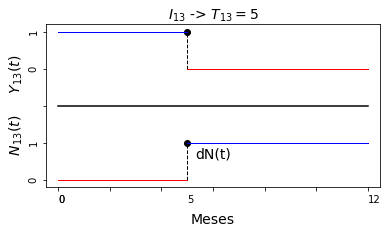

Indivíduo: 14, Trajetória de Sobrevivência: 8.


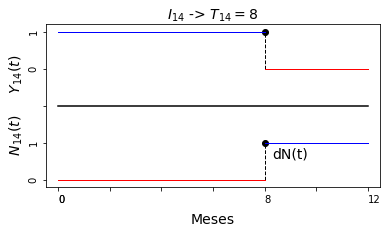

Indivíduo: 15, Trajetória de Sobrevivência: 1.


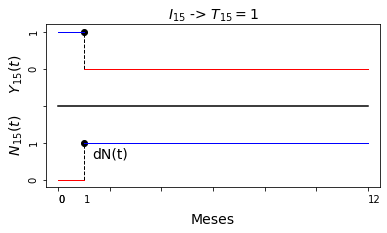

In [5]:
#entry_individual = np.zeros(15, dtype=np.int)
#actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
#censured = np.ones(15, dtype=np.int)

# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")


<a id='E2.1.c'></a>
#### c) Como você construiria um banco de dados para analisar estes dados pelo processo clássico?

In [6]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo,Status
0,1,6,1
1,2,12,1
2,3,10,1
3,4,3,1
4,5,5,1
5,6,1,1
6,7,6,1
7,8,8,1
8,9,1,1
9,10,5,1


<a id='E2.1.a'></a>
#### d)E pelo processo de contagem?

In [7]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df['Tempo Inicial'] = 0
df = df[['Tempo Inicial', 0]]
df = df.reset_index()
df = df.rename(columns={0: 'Tempo Final', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo Inicial,Tempo Final,Status
0,1,0,6,1
1,2,0,12,1
2,3,0,10,1
3,4,0,3,1
4,5,0,5,1
5,6,0,1,1
6,7,0,6,1
7,8,0,8,1
8,9,0,1,1
9,10,0,5,1


## Exercício 2.2  <a id='Exercicio2.2'></a>

Considere agora o tempo de sobrevivência de 15 pacientes submetidos à hemodiálise. Neste caso, a variável de interesse  é  o  tempo  desde  a  primeira diálise até o óbito (em meses).

2, 4, 29+, 6+, 3, 1, 1, 2, 3, 9+, 10, 11, 5+, 5, 1

Os tempos censurados (censura a direita) estão indicados pelo sinal de +.

Considere  que todos os pacientes entraram juntos no início do estudo.

* [**a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.**](#E2.2.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.2.b)
* [**c) Construa um banco de dados para analisar esses dados pelo processo clássico.**](#E2.2.c)
* [**d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo**](#E2.2.d)

[Topo](#topo)

<a id='E2.2.a'></a>
#### a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.

Tempo de vida observado: 
 [ 2  4 29  6  3  1  1  2  3  9 10 11  5  5  1] 



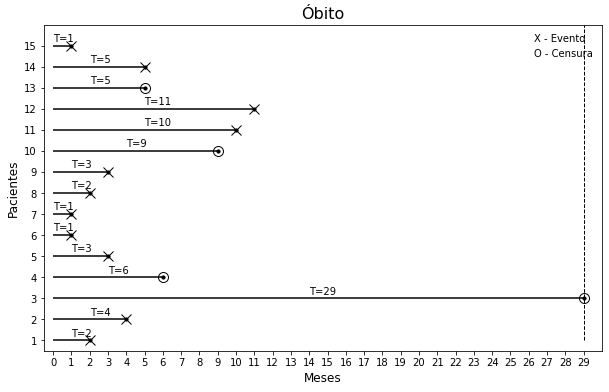

In [8]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
current_time = max(actual_lifetimes + entry_individual) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Óbito",
                   10, 6) # Plot size

<a id='E2.2.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.

Indivíduo: 1, Trajetória de Sobrevivência: 2.


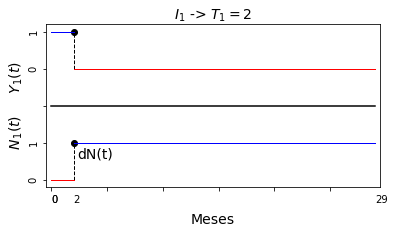

Indivíduo: 2, Trajetória de Sobrevivência: 4.


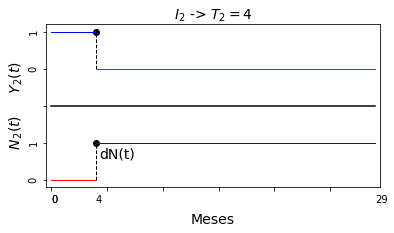

Indivíduo: 3, Trajetória de Sobrevivência: 29.


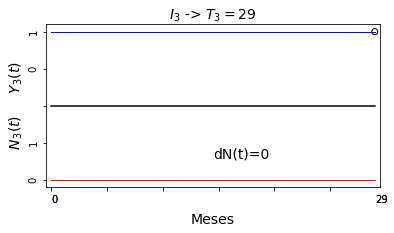

Indivíduo: 4, Trajetória de Sobrevivência: 6.


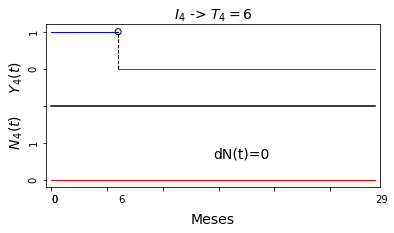

Indivíduo: 5, Trajetória de Sobrevivência: 3.


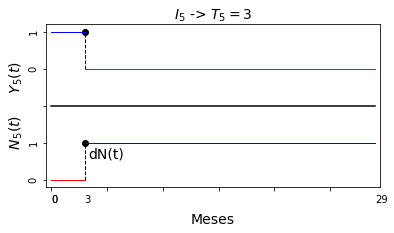

Indivíduo: 6, Trajetória de Sobrevivência: 1.


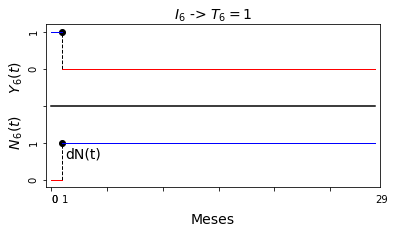

Indivíduo: 7, Trajetória de Sobrevivência: 1.


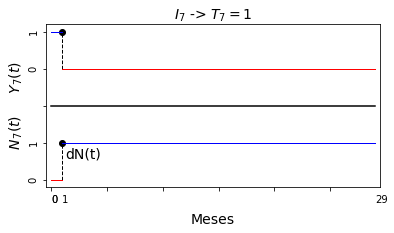

Indivíduo: 8, Trajetória de Sobrevivência: 2.


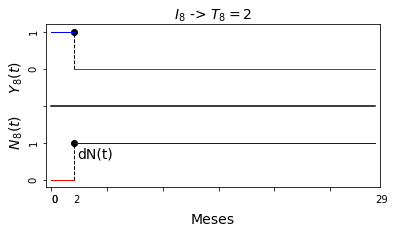

Indivíduo: 9, Trajetória de Sobrevivência: 3.


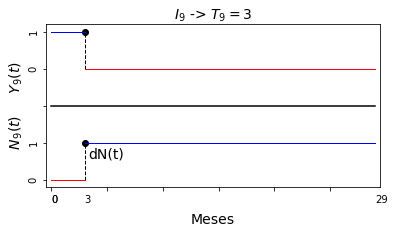

Indivíduo: 10, Trajetória de Sobrevivência: 9.


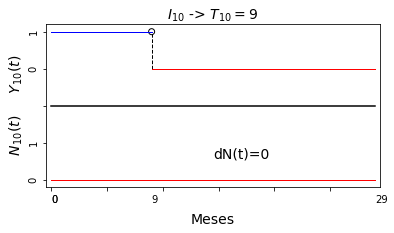

Indivíduo: 11, Trajetória de Sobrevivência: 10.


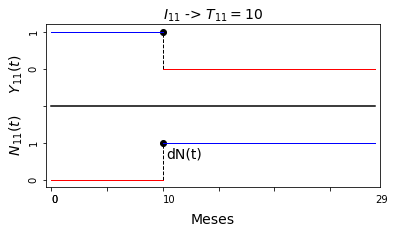

Indivíduo: 12, Trajetória de Sobrevivência: 11.


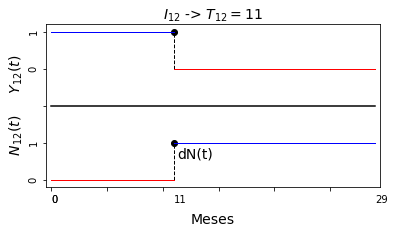

Indivíduo: 13, Trajetória de Sobrevivência: 5.


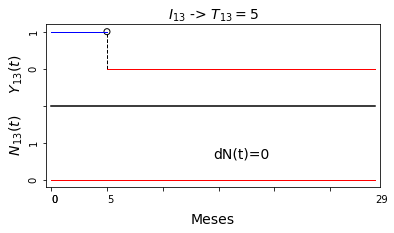

Indivíduo: 14, Trajetória de Sobrevivência: 5.


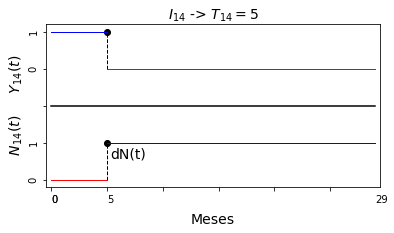

Indivíduo: 15, Trajetória de Sobrevivência: 1.


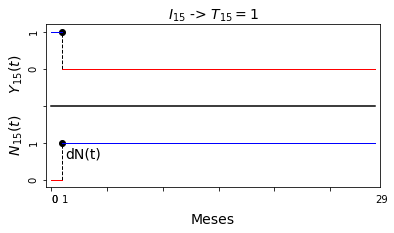

In [9]:
#entry_individual = np.zeros(15, dtype=np.int)
#actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
#censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])

# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

<a id='E2.2.c'></a>
#### c) Construa um banco de dados para analisar esses dados pelo processo clássico.

In [10]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df['Paciente'] = df['Paciente'] + 1
df

,Paciente,Tempo,Status
0,1,2,1
1,2,4,1
2,3,29,0
3,4,6,0
4,5,3,1
5,6,1,1
6,7,1,1
7,8,2,1
8,9,3,1
9,10,9,0


<a id='E2.2.d'></a>
#### d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo.

In [11]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df['Tempo Inicial'] = np.array([0, 1, 12, 3, 1, 7, 0, 1, 1, 3, 12, 4, 4, 1, 22])
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Paciente'] = df['Paciente'] + 1
df['Tempo Final'] = df['Tempo Inicial'] + df['Tempo']
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df

,Paciente,Tempo,Tempo Inicial,Tempo Final,Status
0,1,2,0,2,1
1,2,4,1,5,1
2,3,29,12,41,0
3,4,6,3,9,0
4,5,3,1,4,1
5,6,1,7,8,1
6,7,1,0,1,1
7,8,2,1,3,1
8,9,3,1,4,1
9,10,9,3,12,0


## Exercício 2.3  <a id='Exercicio2.3'></a>

Suponha que, em um hospital, 6 pacientes HIV positivo são acompanhados ao longo  de  um  ano.

No  gráfico  abaixo,  as  linhas  horizontais  representam  o  tempo  de acompanhamento  de  cada  paciente. Represente,  utilizando  as variáveis N(t) e Y (t), as trajetórias de cada um dos 6 pacientes.

[Topo](#topo)


Tempo de vida observado: 
 [ 9  6  3 12  6  4] 



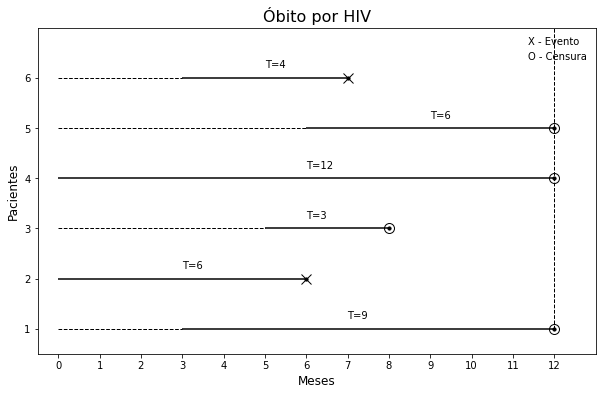

In [12]:
# Dados de sobrevivência
entry_individual = np.array([3,0,5,0,6,3])
actual_lifetimes = np.array([9,6,3,12,6,4])
censured = np.array([0,1,0,0,0,1])
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Óbito por HIV",
                   10, 6) # Plot size

Indivíduo: 1, Trajetória de Sobrevivência: 9.


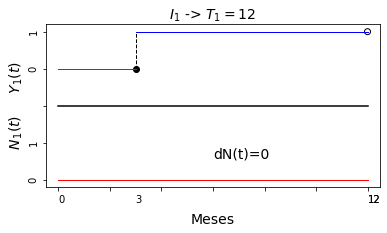

Indivíduo: 2, Trajetória de Sobrevivência: 6.


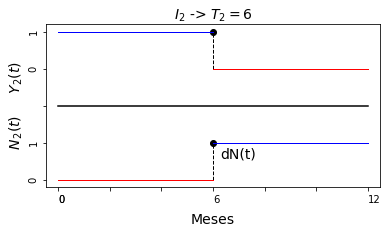

Indivíduo: 3, Trajetória de Sobrevivência: 3.


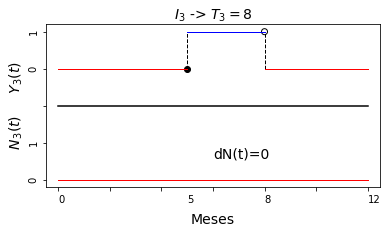

Indivíduo: 4, Trajetória de Sobrevivência: 12.


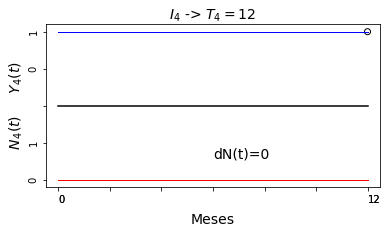

Indivíduo: 5, Trajetória de Sobrevivência: 6.


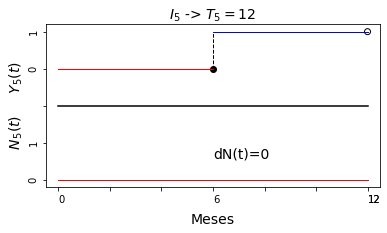

Indivíduo: 6, Trajetória de Sobrevivência: 4.


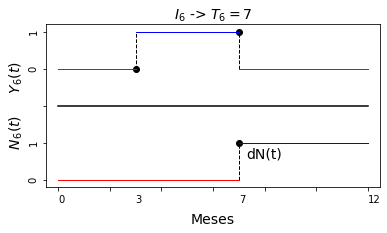

In [13]:
# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

## Exercício 2.4  <a id='Exercicio2.4'></a>

Um paciente tem a seguinte trajetória de observação, segundo oprocesso de contagem abaixo.

[Topo](#topo)

Indivíduo: 1, Trajetória de Sobrevivência: 2.


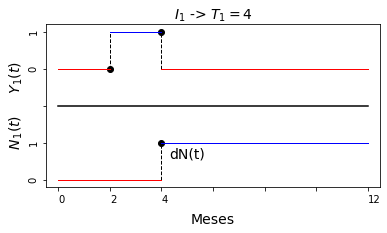

Indivíduo: 2, Trajetória de Sobrevivência: 12.


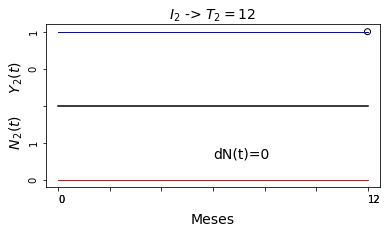

Qual foi o mês de entrada do paciente no estudo? 2
Em que mês ocorreu o desfecho? 4
Quais os meses em que o paciente estava sob risco de óbito? 2 3 4


In [14]:
entry_individual = np.array([2,0])
actual_lifetimes = np.array([2,12])
censured = np.array([1,0])
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

print("Qual foi o mês de entrada do paciente no estudo?", 2)
print("Em que mês ocorreu o desfecho?", 4)
print("Quais os meses em que o paciente estava sob risco de óbito?", 2, 3, 4)

## Exercício 2.5  <a id='Exercicio2.5'></a>

Um paciente tem a seguinte trajetória de observação, segundo oprocesso de contagem abaixo.

[Topo](#topo)

Indivíduo: 1, Trajetória de Sobrevivência: 8.


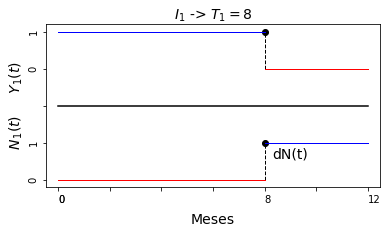

Indivíduo: 2, Trajetória de Sobrevivência: 12.


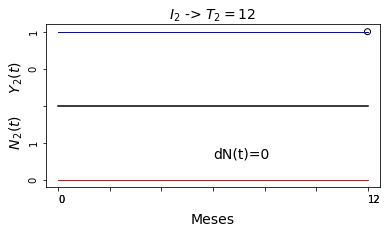

Qual foi o mês de entrada do paciente no estudo? 0
Em que mês ocorreu o desfecho? 8


In [15]:
entry_individual = np.array([0,0])
actual_lifetimes = np.array([8,12])
censured = np.array([1,0])
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

print("Qual foi o mês de entrada do paciente no estudo?", 0)
print("Em que mês ocorreu o desfecho?", 8)

## Exercício 2.6  <a id='Exercicio2.6'></a>

Considere os dados de 6 indivíduos em uma coorte para a avaliação de fatores de  risco  para  a  infecção  por  HIV.

O  estudo  iniciou-se em  01/06/2008  quando  2  indivíduos entraram  no  estudo,  com  resultados  negativos  para  a  infecção.

Um  deles  ao  realizar  o segundo exame, um mês depois, teve resultado positivo, o outro positivou depois de 2 meses.

Os outros 4 indivíduos realizaram seus primeiros exames em 01/07, 01/09, 01/08 e 01/08, e as suas respectivas datas de soroconversões foram 2, 3, 2 e 5 meses, após a entrada.

* [**a) Construa um banco de dados no formato clássico.**](#E2.6.a)
* [**b) Construa um banco de dados em formato de processo de contagem..**](#E2.6.b)
* [**c) Represente graficamente os tempos observados desses indivíduos.**](#E2.6.c)
* [**d) Represente as trajetórias dos seis indivíduos utilizando as variáveis N(t) e Y (t).**](#E2.6.d)

[Topo](#topo)

In [0]:
entry_individual = np.array([0,0,1,3,2,2])
actual_lifetimes = np.array([1,2,2,3,2,5])
censured = np.array([1,1,1,1,1,1])
current_time = max(actual_lifetimes+entry_individual) + 1  #This variable defines the time window


<a id='E2.6.a'></a>
#### **a) Construa um banco de dados no formato clássico.**

In [17]:
df = pd.DataFrame(actual_lifetimes)
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Indivíduo'})
df['Status'] = censured
df['Indivíduo'] = df['Indivíduo'] + 1
df

,Indivíduo,Tempo,Status
0,1,1,1
1,2,2,1
2,3,2,1
3,4,3,1
4,5,2,1
5,6,5,1


<a id='E2.6.b'></a>
#### **b) Construa um banco de dados em formato de processo de contagem..**

In [18]:
df = pd.DataFrame(actual_lifetimes)
df['Início'] = entry_individual
df = df[['Início', 0]]
df = df.reset_index()
df = df.rename(columns={0: 'Fim', 'index':'Indivíduo'})
df['Status'] = censured
df['Indivíduo'] = df['Indivíduo'] + 1
df['Fim'] = df['Fim'] + df['Início']
df

,Indivíduo,Início,Fim,Status
0,1,0,1,1
1,2,0,2,1
2,3,1,3,1
3,4,3,6,1
4,5,2,4,1
5,6,2,7,1


<a id='E2.6.c'></a>
### **c) Represente graficamente os tempos observados desses indivíduos.**

Tempo de vida observado: 
 [1 2 2 3 2 5] 



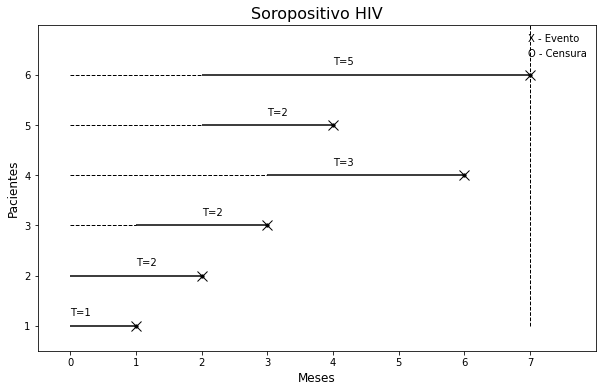

In [19]:
# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Soropositivo HIV",
                   10, 6) # Plot size

<a id='E2.6.d'></a>
#### **d) Represente as trajetórias dos seis indivíduos utilizando as variáveis N(t) e Y (t).**

Indivíduo: 1, Trajetória de Sobrevivência: 1.


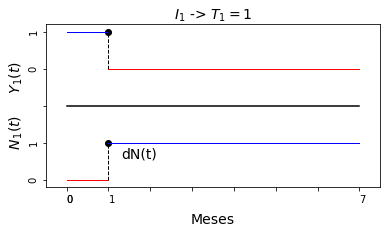

Indivíduo: 2, Trajetória de Sobrevivência: 2.


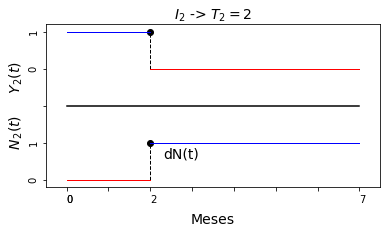

Indivíduo: 3, Trajetória de Sobrevivência: 2.


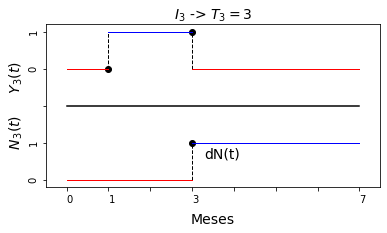

Indivíduo: 4, Trajetória de Sobrevivência: 3.


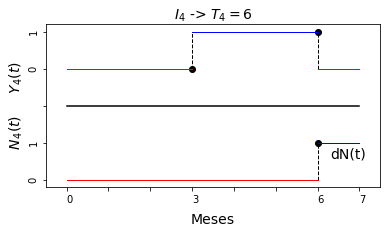

Indivíduo: 5, Trajetória de Sobrevivência: 2.


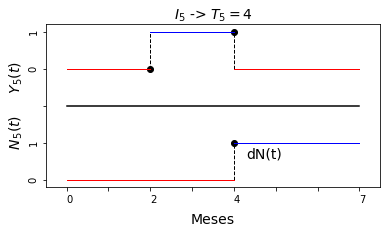

Indivíduo: 6, Trajetória de Sobrevivência: 5.


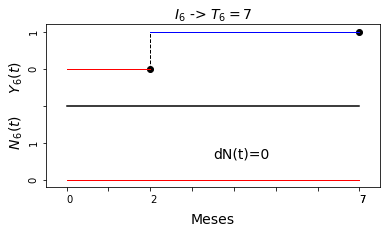

In [20]:
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

e) Quais são os indivíduos em risco no 5º mês do estudo?

**4 e 6**

f) Que tipo de censura ocorreu neste estudo?

**Censura intervalar**

g) Em que situação haveria truncamento?

**Incluíndo indivíduos já HIV positivos, ainda vivos no momento do primeiro exame.**

## Exercício 2.7  <a id='Exercicio2.7'></a>

Para se familiarizar com o banco de dados do IPEC (ipec.csv, veja o Apêndice, seção AIDS – clássico) que será utilizado nos próximos capítulos, inicie a análise de sobrevivência observando os dados dos pacientes.


[Topo](#topo)

#### Load dataset

In [21]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/ipec.csv', sep=';')
df.describe()

,id,ini,fim,tempo,status,escola,idade,risco,acompan,anotrat,tratam,doenca,propcp
count,193.000000,193.000000,193.000000,193.000000,193.000000,182.000000,193.000000,156.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,2396.922280,3335.160622,938.238342,0.466321,1.241758,36.554404,1.506410,0.896373,1542.005181,1.098446,37.958549,2.948187
std,55.858452,1216.918778,1501.300776,770.741415,0.500162,1.049500,9.508680,1.975648,0.691946,835.230679,0.832696,44.700489,1.603190
min,1.000000,1.000000,96.000000,16.000000,0.000000,0.000000,20.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000
25%,49.000000,1406.000000,2095.000000,290.000000,0.000000,0.000000,30.000000,0.000000,0.000000,1990.000000,1.000000,3.000000,2.000000
50%,97.000000,2454.000000,3711.000000,852.000000,0.000000,1.000000,35.000000,0.000000,1.000000,1993.000000,1.000000,8.000000,4.000000
75%,145.000000,3314.000000,4790.000000,1348.000000,1.000000,2.000000,43.000000,3.000000,1.000000,1996.000000,2.000000,99.000000,4.000000
max,193.000000,4593.000000,4822.000000,3228.000000,1.000000,3.000000,68.000000,6.000000,2.000000,2000.000000,3.000000,99.000000,4.000000


In [22]:
df.head()

,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,1,M,3.0,34,0.0,1,S,1991,1,4,3
1,2,2800,2923,123,1,M,2.0,38,6.0,1,S,9,0,7,4
2,3,1250,2395,1145,1,M,NaN,32,0.0,1,S,1992,1,3,4
3,4,1915,4670,2755,0,M,NaN,43,6.0,0,N,1992,1,10,4
4,5,2653,4770,2117,0,M,NaN,40,0.0,1,N,1992,1,5,4


<a id='surv'></a>
#### Function: surv

In [0]:
# Imprime variável de responsta e devolve em um array
def surv(p_df, p_ini, p_fim, p_tempo, p_status):
    tempDf = pd.DataFrame()
    classic_list = []
    count_list = []

    # Classic format
    if p_tempo != '':    
        result = ""
        for index, row in p_df.iterrows():
            value = ("%s" % row[p_tempo]) + ("+" if row[p_status] == 0 else "")
            result = result + "\t" + value
            classic_list.append(value)

        tempDf['Classic'] = np.array(classic_list)
        print(result)

    # Count process format
    line_counts = 0
    if p_ini != '':    
        result = ""
        for index, row in p_df.iterrows():
            value = ("(%s,%s" % (row[p_ini],row[p_fim])) + ("+" if row[p_status] == 0 else "") + "]"
            result = result + "\t" + value
            count_list.append(value)

        tempDf['Score'] = np.array(count_list)
        print(result)

    return tempDf

#### a) No formato clássico

In [24]:
dfAux = surv(df, '', 'fim', 'tempo', 'status')

	852	123	1145	2755+	2117+	329+	60	151	1563	1247	84	214	25+	1348	158	555	408	1116	998	1125	944+	54	151	855	116	80+	1757+	194	183	37	237+	1506	168+	134	803+	18	371	173	688	163	3178+	29	50+	887	516	645	310	204	1344+	1261	285	83	150	1307+	1076+	1226	865+	811	2898	80	967	618	235	2236+	152	892	81+	1085	1073+	1615+	35	290	1780+	3228+	52	733	3213+	1983	2304+	572	21	1272+	1646+	304	418	854	2973+	40	850	1139	323	1507+	2717+	1735+	388+	145	905	927	1027+	631	2495+	1331+	623	2568+	2013+	721	1952+	397	254	1630+	1523+	146+	108	1835+	499	333	202+	2437+	1015	2138+	22	2090+	179	2439+	1063+	85+	343+	2215+	259	2258+	1371	39	2371+	975+	952	2492+	1478+	295+	992	1011+	644	426	537+	1454+	1869+	714+	1310+	2084+	1918+	1649+	290+	1685+	1348+	652+	1384+	1471+	1512+	378+	1352+	419	1426+	1488+	1315+	643+	1197+	1343+	1176+	944	340	881+	915+	948+	985+	1242+	955+	987+	899+	1056+	775	785+	731+	16	680+	21+	444+	524+	217+	440+	470+	390+	344+	578+	504+


#### b) No formato de processo de contagem

In [25]:
dfAux = surv(df, 'ini', 'fim', '', 'status')

	(1243,2095]	(2800,2923]	(1250,2395]	(1915,4670+]	(2653,4770+]	(3,332+]	(36,96]	(1,152]	(544,2107]	(71,1318]	(946,1030]	(802,1016]	(266,291+]	(1544,2892]	(57,215]	(1270,1825]	(2753,3161]	(940,2056]	(393,1391]	(1000,2125]	(238,1182+]	(423,477]	(206,357]	(480,1335]	(226,342]	(249,329+]	(3052,4809+]	(1802,1996]	(1395,1578]	(354,391]	(493,730+]	(1113,2619]	(638,806+]	(655,789]	(1189,1992+]	(943,961]	(1715,2086]	(792,965]	(1037,1725]	(820,983]	(884,4062+]	(2262,2291]	(1121,1171+]	(1131,2018]	(878,1394]	(1316,1961]	(1107,1417]	(1190,1394]	(393,1737+]	(1274,2535]	(1172,1457]	(2360,2443]	(2074,2224]	(1019,2326+]	(605,1681+]	(1915,3141]	(3948,4813+]	(1314,2125]	(1502,4400]	(1347,1427]	(1379,2346]	(2352,2970]	(2625,2860]	(2586,4822+]	(1406,1558]	(1466,2358]	(3314,3395+]	(3413,4498]	(3712,4785+]	(3207,4822+]	(1592,1627]	(1537,1827]	(3018,4798+]	(1555,4783+]	(1541,1593]	(1589,2322]	(1609,4822+]	(1682,3665]	(2465,4769+]	(1243,1815]	(1667,1688]	(1605,2877+]	(3157,4803+]	(2066,2370]	(1929,2347]	(2216

#### c) Observe a saída nos dois formatos. Quais os tempos e status do 1o e 79o pacientes em cada um dos formatos?


In [26]:
dfAux = surv(df, 'ini', 'fim', 'tempo', 'status')
print("\nPaciente 1")
print("Tempo processo clássico: " + dfAux.Classic[0])
print("Tempo processo de contagem: " + dfAux.Score[0])
print("")
print("Paciente 79")
print("Tempo processo clássico: " + dfAux.Classic[78])
print("Tempo processo de contagem: " + dfAux.Score[78])


	852	123	1145	2755+	2117+	329+	60	151	1563	1247	84	214	25+	1348	158	555	408	1116	998	1125	944+	54	151	855	116	80+	1757+	194	183	37	237+	1506	168+	134	803+	18	371	173	688	163	3178+	29	50+	887	516	645	310	204	1344+	1261	285	83	150	1307+	1076+	1226	865+	811	2898	80	967	618	235	2236+	152	892	81+	1085	1073+	1615+	35	290	1780+	3228+	52	733	3213+	1983	2304+	572	21	1272+	1646+	304	418	854	2973+	40	850	1139	323	1507+	2717+	1735+	388+	145	905	927	1027+	631	2495+	1331+	623	2568+	2013+	721	1952+	397	254	1630+	1523+	146+	108	1835+	499	333	202+	2437+	1015	2138+	22	2090+	179	2439+	1063+	85+	343+	2215+	259	2258+	1371	39	2371+	975+	952	2492+	1478+	295+	992	1011+	644	426	537+	1454+	1869+	714+	1310+	2084+	1918+	1649+	290+	1685+	1348+	652+	1384+	1471+	1512+	378+	1352+	419	1426+	1488+	1315+	643+	1197+	1343+	1176+	944	340	881+	915+	948+	985+	1242+	955+	987+	899+	1056+	775	785+	731+	16	680+	21+	444+	524+	217+	440+	470+	390+	344+	578+	504+
	(1243,2095]	(2800,2923]	(1250,2395]	(1915,4670+]	(2653,4770+]	(3,332+

## Exercício 2.8  <a id='Exercicio2.8'></a>

Análise Exploratória do banco do IPEC


[Topo](#topo)

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/ipec.csv', sep=';')

#### a) Verifique as dimensões dos dados


In [28]:
df.shape

(193, 15)

#### b) Veja quais são as variáveis que constam no arquivo de dados

In [29]:
df.columns

Index(['id', 'ini', 'fim', 'tempo', 'status', 'sexo', 'escola', 'idade',
       'risco', 'acompan', 'obito', 'anotrat', 'tratam', 'doenca', 'propcp'],
      dtype='object')

In [30]:
df.head()

,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,1,M,3.0,34,0.0,1,S,1991,1,4,3
1,2,2800,2923,123,1,M,2.0,38,6.0,1,S,9,0,7,4
2,3,1250,2395,1145,1,M,NaN,32,0.0,1,S,1992,1,3,4
3,4,1915,4670,2755,0,M,NaN,43,6.0,0,N,1992,1,10,4
4,5,2653,4770,2117,0,M,NaN,40,0.0,1,N,1992,1,5,4


In [31]:
for col in df.columns:
    print(col)
    print(df[col].unique())


id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193]
ini
[1243 2800 1250 1915 2653    3   36    1  544   71  946  802  266 1544
   57 1270 2753  940  393 1000  238  423  206  480  226  249 3052 1802
 1395  354  493 1113  638  655 1189  943 1715  792 1037  820  884 2

#### c) Substitua as informações ignoradas codificadas com 9/99 ou I por NA

In [32]:
dfAux = df.copy()
dfAux.anotrat.replace({9:'NA'}, inplace=True)
print('anotrat: ')
print(dfAux.anotrat.unique())

dfAux.obito.replace({'I':'NA'}, inplace=True)
print('obito: ')
print(dfAux.obito.unique())

dfAux.escola.fillna(9, inplace=True)
print('escola: ')
print(dfAux.escola.unique())

dfAux.fillna('NA', inplace=True)
dfAux[:5]

anotrat: 
[1991 'NA' 1992 1993 1990 1995 1994 1998 1997 1996 1999 2000]
obito: 
['S' 'N' 'NA']
escola: 
[3. 2. 9. 0. 1.]


,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,1,M,3.0,34,0,1,S,1991,1,4,3
1,2,2800,2923,123,1,M,2.0,38,6,1,S,NA,0,7,4
2,3,1250,2395,1145,1,M,9.0,32,0,1,S,1992,1,3,4
3,4,1915,4670,2755,0,M,9.0,43,6,0,N,1992,1,10,4
4,5,2653,4770,2117,0,M,9.0,40,0,1,N,1992,1,5,4


In [33]:
for index, row in dfAux[:10].iterrows():
    print("O paciente %d é do sexo %s, tem %d anos e foi acompanhado por %d dias %s" % 
          (row.id, ("masculino" if row.sexo == 'M' else "feminino"),row.idade, row.tempo, ("até a data do seu óbito." if row.obito == 'S' else ".")))

O paciente 1 é do sexo masculino, tem 34 anos e foi acompanhado por 852 dias até a data do seu óbito.
O paciente 2 é do sexo masculino, tem 38 anos e foi acompanhado por 123 dias até a data do seu óbito.
O paciente 3 é do sexo masculino, tem 32 anos e foi acompanhado por 1145 dias até a data do seu óbito.
O paciente 4 é do sexo masculino, tem 43 anos e foi acompanhado por 2755 dias .
O paciente 5 é do sexo masculino, tem 40 anos e foi acompanhado por 2117 dias .
O paciente 6 é do sexo masculino, tem 34 anos e foi acompanhado por 329 dias .
O paciente 7 é do sexo masculino, tem 27 anos e foi acompanhado por 60 dias até a data do seu óbito.
O paciente 8 é do sexo masculino, tem 22 anos e foi acompanhado por 151 dias até a data do seu óbito.
O paciente 9 é do sexo masculino, tem 44 anos e foi acompanhado por 1563 dias até a data do seu óbito.
O paciente 10 é do sexo masculino, tem 23 anos e foi acompanhado por 1247 dias até a data do seu óbito.


#### d) Indique quais são as variáveis que estão erroneamente classificadas como numéricas (isso acontece quando números são usados para codificar as categorias).


In [34]:
dfAux = df.copy()

ipec_dict = {'status': {0:'censura',
                        1:'óbito'},
             'escola': {0:'sem escolaridade', 1:'ensino fundamental', 
                        2:'ensino médio', 3:'ensino superior'},
             'risco': {0:'homossexual masculino', 1:'usuário de drogas injetáveis', 2:'transfusão', 
                       3:'contato sexual com HIV+', 5:'hétero c/múltiplos parceiros', 6:'dois fatores de risco'},
             'acompan': {0:'ambulatorial/hospital-dia', 1:'internação posterior', 2:'internação imediata'},
             'tratam':  {0:'nenhum', 1:'mono', 2:'combinada', 3:'potente'},
             'doenca': {1:'pcp', 2:'pcp pulmonar', 3:'pcp disseminada', 4:'toxoplasmose', 5:'sarcoma', 
                        7:'outra doença', 8:'candidíase', 9:'duas doenças', 10:'herpes', 99:'definido por cd4'},
             'propcp': {0:'sem profilaxia', 2:'primária', 3:'secundária', 4:'ambas'},
             'obito': {'S':'óbito', 'N':'não óbito', 'I':'ignorado'}
            }

dfAux.anotrat.replace({9:'NA'}, inplace=True)
dfAux.fillna('NA', inplace=True)
dfAux.replace(ipec_dict, inplace=True)
dfAux.head()

,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,óbito,M,ensino superior,34,homossexual masculino,internação posterior,óbito,1991,mono,toxoplasmose,secundária
1,2,2800,2923,123,óbito,M,ensino médio,38,dois fatores de risco,internação posterior,óbito,NA,nenhum,outra doença,ambas
2,3,1250,2395,1145,óbito,M,NA,32,homossexual masculino,internação posterior,óbito,1992,mono,pcp disseminada,ambas
3,4,1915,4670,2755,censura,M,NA,43,dois fatores de risco,ambulatorial/hospital-dia,não óbito,1992,mono,herpes,ambas
4,5,2653,4770,2117,censura,M,NA,40,homossexual masculino,internação posterior,não óbito,1992,mono,sarcoma,ambas


#### e) Calcule as medidas resumo das variáveis presentes no banco

In [35]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in df.columns:
    if is_string_dtype(dfAux[col]):
        print('-----------------------------')
        print('Feature: %s' % col)
        print(dfAux[col].describe())
        print('-- Counts')
        print(dfAux[col].value_counts())
    else:
        print('-----------------------------')
        print('Feature: %s' % col)
        print(dfAux[col].describe())
    

-----------------------------
Feature: id
count    193.000000
mean      97.000000
std       55.858452
min        1.000000
25%       49.000000
50%       97.000000
75%      145.000000
max      193.000000
Name: id, dtype: float64
-----------------------------
Feature: ini
count     193.000000
mean     2396.922280
std      1216.918778
min         1.000000
25%      1406.000000
50%      2454.000000
75%      3314.000000
max      4593.000000
Name: ini, dtype: float64
-----------------------------
Feature: fim
count     193.000000
mean     3335.160622
std      1501.300776
min        96.000000
25%      2095.000000
50%      3711.000000
75%      4790.000000
max      4822.000000
Name: fim, dtype: float64
-----------------------------
Feature: tempo
count     193.000000
mean      938.238342
std       770.741415
min        16.000000
25%       290.000000
50%       852.000000
75%      1348.000000
max      3228.000000
Name: tempo, dtype: float64
-----------------------------
Feature: status
count       

#### f) Construa também tabelas de freqüência das variáveis de maior interesse

In [36]:
pd.DataFrame(dfAux.groupby('escola').size())

,0
escola,
NA,11
ensino fundamental,44
ensino médio,55
ensino superior,24
sem escolaridade,59


In [37]:
pd.DataFrame(dfAux.groupby('tratam').size())

,0
tratam,
combinada,35
mono,100
nenhum,44
potente,14


In [38]:
pd.DataFrame(dfAux.groupby(['status']).size())

,0
status,
censura,103
óbito,90


In [39]:
pd.DataFrame(dfAux.groupby(['sexo','escola']).size())

0
sexo escola                
F    NA                   1
     ensino fundamental  11
     ensino médio        12
     ensino superior      1
     sem escolaridade    24
M    NA                  10
     ensino fundamental  33
     ensino médio        43
     ensino superior     23
     sem escolaridade    35

In [40]:
pd.DataFrame(dfAux.groupby(['risco','sexo']).size())

0
risco                        sexo    
NA                           F     17
                             M     20
contato sexual com HIV+      F     25
                             M      5
dois fatores de risco        F      1
                             M      6
homossexual masculino        M     87
hétero c/múltiplos parceiros F      2
                             M     14
transfusão                   F      2
                             M      5
usuário de drogas injetáveis F      2
                             M      7

#### g) Construa gráficos para o tempo de sobrevivência e para outras variáveis de interesse

In [41]:
import plotly.express as px
fig = px.box(df, x = 'sexo', y='idade', points='all')
fig.update_layout(title_text='Idade por gênero',
                  xaxis_title_text='Sexo',
                  yaxis_title_text='Idade'
)
fig.show()

In [42]:
fig = px.box(dfAux, x='sexo', y='idade', color='risco')
fig.update_layout(title_text='Idade por sexo e risco',
                  xaxis_title_text='Sexo',
                  yaxis_title_text='Idade'
)
fig.show()

In [43]:
fig = px.histogram(dfAux, x="obito", y="id", histfunc='count', facet_col='sexo', opacity=0.5)
fig.update_layout(title_text='Sobrevivência',
                  xaxis_title_text='Ocorrência', # xaxis label
                  yaxis_title_text='Quantidade', # yaxis label
                  bargap=0.05, # gap between bars of adjacent location coordinates
)

fig.show()

In [44]:
fig = px.histogram(dfAux, x="tempo", nbins=10, labels={'tempo':'Dias'}, opacity=0.5)
fig.update_layout(title_text='Sobrevivência',
                  xaxis_title_text='Dias', # xaxis label
                  yaxis_title_text='Frequência', # yaxis label
)
fig.show()

In [45]:
fig = px.histogram(dfAux, x="tempo", nbins=10, color='sexo', labels={'tempo':'Dias'}, opacity=0.75)
fig.update_layout(title_text='Sobrevivência',
                  xaxis_title_text='Dias', # xaxis label
                  yaxis_title_text='Frequência', # yaxis label
                  bargap=0.05, # gap between bars of adjacent location coordinates
)
fig.show()

In [46]:
fig = px.histogram(dfAux.loc[dfAux['status'] == 'óbito'], x="tempo", nbins=10, color='sexo', labels={'tempo':'Dias'}, opacity=0.75)
fig.update_layout(title_text='Eventos',
                  xaxis_title_text='Dias', # xaxis label
                  yaxis_title_text='Frequência', # yaxis label
                  bargap=0.05, # gap between bars of adjacent location coordinates
)
fig.show()

In [47]:
fig = px.histogram(dfAux.loc[dfAux['status'] == 'censura'], x="tempo", nbins=10, color='sexo', labels={'tempo':'Dias'}, opacity=0.75)
fig.update_layout(title_text='Censurados',
                  xaxis_title_text='Dias', # xaxis label
                  yaxis_title_text='Frequência', # yaxis label
                  bargap=0.05, # gap between bars of adjacent location coordinates
)
fig.show()